## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')
%matplotlib inline


In [19]:
pd.set_option("display.max_columns", None)
pd.set_option("max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

## Reading the data

In [3]:
df = pd.read_csv(r"C:\Users\harsh\College\ML-Assignments\Data Sets\MLK\cleantel.csv")


In [4]:
df.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,29.85,29.85,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,34,1,1,0,56.95,1889.50,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,2,1,0,1,53.85,108.15,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,45,0,1,0,42.30,1840.75,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0,0,2,1,0,1,70.70,151.65,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [5]:
# Getting feature name who have unqiue values greater than 5

col_list = df.nunique()[df.nunique() > 5].index.tolist()
col_list


['tenure', 'MonthlyCharges', 'TotalCharges']

tenure


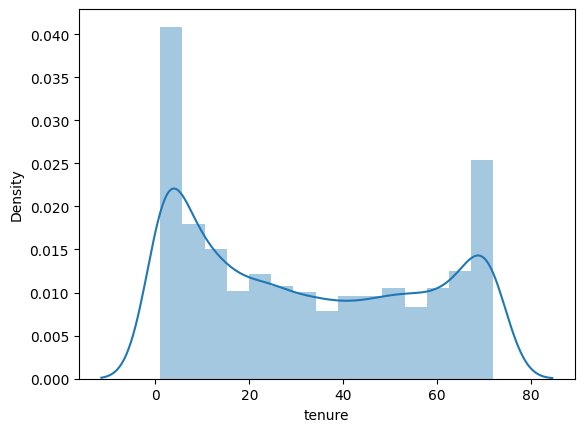

MonthlyCharges


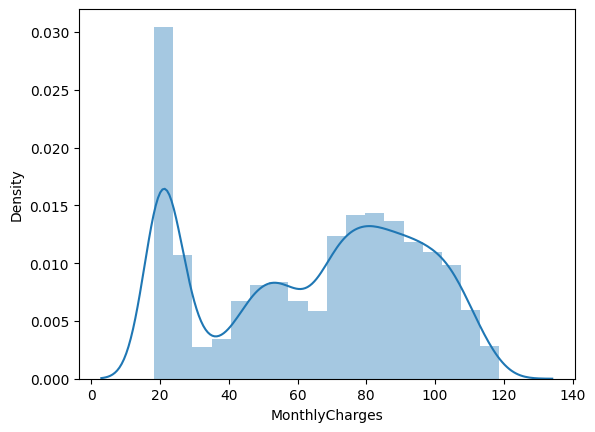

TotalCharges


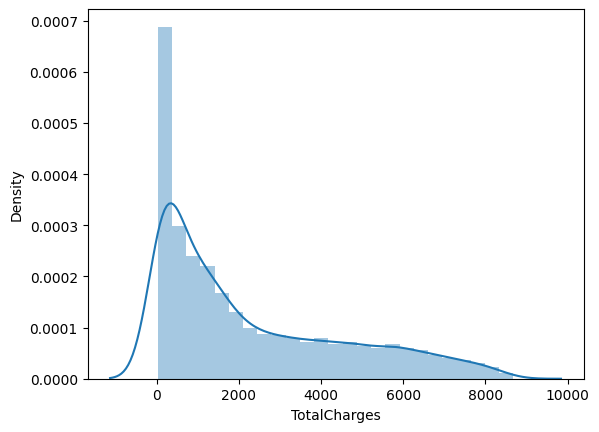

In [6]:
# Plotting Distribution of the features
for i in col_list:
    print(i)
    sns.distplot(df[i])
    plt.show()

In [7]:
# Split data into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:
# Importing the Machine Learning , Metrics and Preprocessing Libraries

# Libraries for Data Splitting and Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import Machine Learning models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Importing Metrics for Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
)


In [9]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
# Creating Decision Tree instance
dt = DecisionTreeClassifier(random_state=42)

In [12]:
# Create a forward SequentialFeatureSelector to select features
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(
    estimator=dt, direction="forward", n_features_to_select=12, cv=5, n_jobs=-1
)

# Fit SFS to the training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_indicesf = list(sfs.get_feature_names_out())
print(selected_indicesf)


['SeniorCitizen', 'Partner', 'tenure', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check']


In [13]:
# Create a backward SequentialFeatureSelector to select features

sfs = SequentialFeatureSelector(
    estimator=dt, direction="backward", n_features_to_select=12, cv=5, n_jobs=-1
)

# Fit SFS to the training data
sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_indicesb = list(sfs.get_feature_names_out())
print(selected_indicesb)


['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check']


In [14]:
indices = list(set(selected_indicesf).union(set(selected_indicesb)))
indices


['DeviceProtection_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_Yes',
 'OnlineSecurity_Yes',
 'SeniorCitizen',
 'tenure',
 'StreamingTV_Yes',
 'Partner',
 'OnlineBackup_No internet service',
 'PaperlessBilling',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Credit card (automatic)',
 'InternetService_No',
 'TechSupport_No internet service',
 'TotalCharges',
 'MonthlyCharges',
 'InternetService_Fiber optic']

# With Selected Indices from SequentialFeatureSelector

In [16]:
# Creating a list of tuples for the model names and the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("XGBoost", XGBClassifier()),
    ("CatBoost", CatBoostClassifier(verbose=0)),
    ("KNN", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB())
]

In [25]:
# Creating a dataframe to store the results
results = pd.DataFrame()

for model_name, model in models:
    model.fit(X_train.loc[:, indices], y_train)
    y_pred = model.predict(X_test.loc[:, indices])
    results = results.append(
        {
            "Model": model_name,
            'Training Score': model.score(X_train.loc[:, indices], y_train),
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred),
            "ROC AUC Score": roc_auc_score(y_test, y_pred),
        },
        ignore_index=True,
    )

# Printing the results
results.set_index("Model", inplace=True)
results.sort_values(by="ROC AUC Score", ascending=False)*100

,Training Score,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model,,,,,,
Naive Bayes,86.63,85.71,66.30,76.01,70.83,82.30
Random Forest,99.86,86.14,68.31,73.21,70.68,81.59
XGBoost,96.59,85.36,66.11,73.52,69.62,81.19
Logistic Regression,86.99,86.28,69.28,71.65,70.44,81.13
CatBoost,93.10,85.36,66.20,73.21,69.53,81.08
Decision Tree,99.86,83.72,63.61,66.98,65.25,77.83
KNN,84.57,79.32,56.52,40.50,47.19,65.65
SVM,77.19,77.19,0.00,0.00,0.00,50.00


# Modeling With All Features

In [26]:
# Creating a dataframe to store the results
results = pd.DataFrame()

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results = results.append(
        {
            "Model": model_name,
            'Training Score': model.score(X_train, y_train),
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred),
            "ROC AUC Score": roc_auc_score(y_test, y_pred),
        },
        ignore_index=True,
    )

# Printing the results
results.set_index("Model", inplace=True)
results.sort_values(by="ROC AUC Score", ascending=False)


,Training Score,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model,,,,,,
XGBoost,0.98,0.86,0.68,0.76,0.72,0.83
CatBoost,0.94,0.87,0.70,0.74,0.72,0.83
Logistic Regression,0.88,0.87,0.70,0.73,0.71,0.82
Naive Bayes,0.86,0.86,0.68,0.72,0.70,0.81
Random Forest,1.00,0.87,0.72,0.70,0.71,0.81
Decision Tree,1.00,0.84,0.62,0.70,0.66,0.79
KNN,0.84,0.79,0.55,0.40,0.46,0.65
SVM,0.77,0.77,0.00,0.00,0.00,0.50


# OverSampling DataSet

In [27]:
# Oversampling the data using SMOTE
from imblearn.over_sampling import SMOTE

# Creating SMOTE instance
os = SMOTE()
# Fitting the data
X_R, y_R = os.fit_resample(X, y)

# Splitting Oversampled data into train and test
XR_train, XR_test, yR_train, yR_test = train_test_split(
    X_R, y_R, test_size=0.3, random_state=42
)


In [30]:
# Creating a dataframe to store the results
results = pd.DataFrame()

for model_name, model in models:
    model.fit(XR_train.loc[:, indices], yR_train)
    y_pred = model.predict(XR_test.loc[:, indices])
    results = results.append(
        {
            "Model": model_name,
            'Training Score': model.score(XR_train.loc[:, indices], yR_train),
            "Accuracy": accuracy_score(yR_test, y_pred),
            "Precision": precision_score(yR_test, y_pred),
            "Recall": recall_score(yR_test, y_pred),
            "F1 Score": f1_score(yR_test, y_pred),
            "ROC AUC Score": roc_auc_score(yR_test, y_pred),
        },
        ignore_index=True,
    )

# Printing the results
results.set_index("Model", inplace=True)
results.sort_values(by="ROC AUC Score", ascending=False)*100

,Training Score,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model,,,,,,
XGBoost,96.60,91.96,89.61,94.73,92.10,91.98
CatBoost,93.95,91.71,88.61,95.53,91.94,91.75
Random Forest,99.92,91.13,89.07,93.55,91.26,91.15
Logistic Regression,87.76,89.07,87.12,91.44,89.23,89.09
Decision Tree,99.92,88.55,88.41,88.46,88.43,88.55
Naive Bayes,86.45,87.69,89.70,84.86,87.22,87.66
KNN,83.67,76.63,73.55,82.44,77.74,76.69
SVM,67.04,67.33,64.48,75.68,69.63,67.42


## Training Model with OverSampled Data with All Features

In [31]:
# Creating a dataframe to store the results
results = pd.DataFrame()

for model_name, model in models:
    model.fit(XR_train, yR_train)
    y_pred = model.predict(XR_test)
    results = results.append(
        {
            "Model": model_name,
            "Accuracy": accuracy_score(yR_test, y_pred),
            "Precision": precision_score(yR_test, y_pred),
            "Recall": recall_score(yR_test, y_pred),
            "F1 Score": f1_score(yR_test, y_pred),
            "ROC AUC Score": roc_auc_score(yR_test, y_pred),
        },
        ignore_index=True,
    )

# Printing the results
results.set_index("Model", inplace=True)
results.sort_values(by="ROC AUC Score", ascending=False)*100


,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model,,,,,
Random Forest,92.26,90.33,94.48,92.36,92.29
XGBoost,92.17,89.89,94.85,92.30,92.20
CatBoost,92.02,89.49,95.04,92.18,92.05
Logistic Regression,90.79,88.77,93.18,90.92,90.81
Decision Tree,89.50,89.25,89.58,89.41,89.50
Naive Bayes,86.86,91.05,81.45,85.99,86.80
KNN,76.42,73.06,82.94,77.69,76.49
SVM,67.36,64.50,75.74,69.67,67.45


In [33]:
# Creating a grid search for Decision Tree on oversampled data
from sklearn.model_selection import GridSearchCV

# Creating a Decision Tree instance
dt = DecisionTreeClassifier(random_state=42)

# Creating a grid of hyperparameters

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}

# Creating a grid search instance

grid_search = GridSearchCV(
    estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2
)

# Fitting the grid search

grid_search.fit(XR_train, yR_train)

# Getting the best parameters

params = grid_search.best_params_


Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


In [37]:
# Creating a Decision Tree instance with the best parameters

dt = DecisionTreeClassifier(**params, random_state=42)

# Fitting the model

dt.fit(XR_train, yR_train)

# Predicting the test set

y_pred = dt.predict(XR_test)

# Printing the results

print('Training Score:', dt.score(XR_train, yR_train))
print("Accuracy:", accuracy_score(yR_test, y_pred))
print("Precision:", precision_score(yR_test, y_pred))
print("Recall:", recall_score(yR_test, y_pred))
print("F1 Score:", f1_score(yR_test, y_pred))
print("ROC AUC Score:", roc_auc_score(yR_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(yR_test, y_pred))

Training Score: 0.9028819581523885
Accuracy: 0.9005219527172245
Precision: 0.8609865470852018
Recall: 0.9528535980148883
F1 Score: 0.9045936395759718
ROC AUC Score: 0.9010468597977178
Confusion Matrix: 
 [[1397  248]
 [  76 1536]]


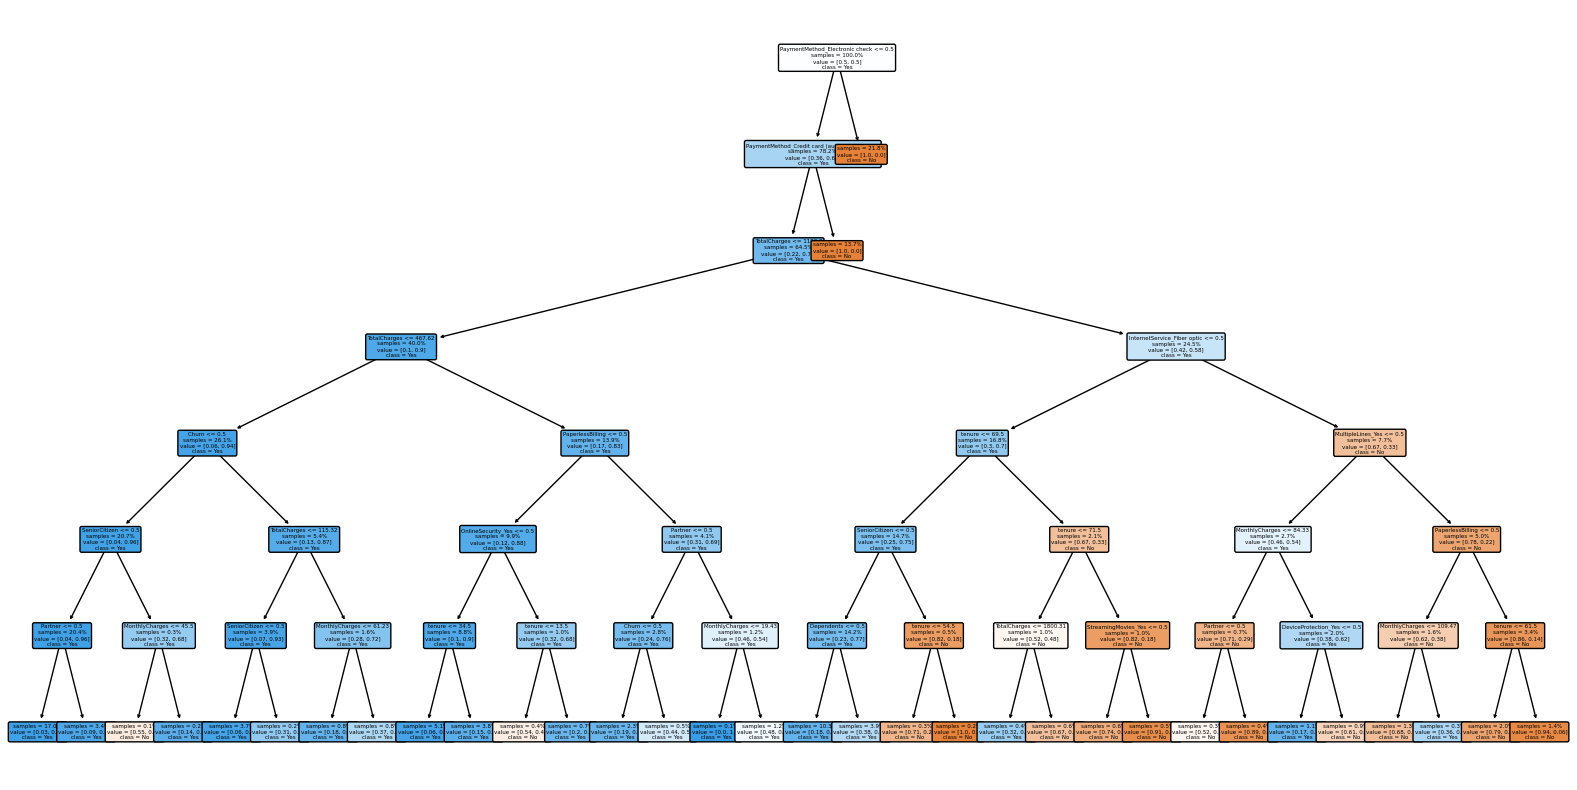

In [43]:
# Plottting the Decision Tree with high resolution

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

plot_tree(dt,feature_names=X.columns,class_names=["No", "Yes"],filled=True,rounded=True,fontsize=4,precision=2,proportion=True,impurity=False)
plt.show()